<a href="https://colab.research.google.com/github/Sanjiwani1wadhave/Assignment-14/blob/main/Assignment_14_Decision_tree_Fraud_check_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_Check.csv to Fraud_Check (1).csv


In [ ]:
data=pd.read_csv("Fraud_Check (1).csv")

In [ ]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [ ]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable

data=pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)

In [ ]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good

data['TaxInc']=pd.cut(data["Taxable.Income"],bins=[10002,30000,99620], labels=["Risky", "Good"] )
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


# **Lets assume: Taxable_income<=30000 as "Risky=0" and others are "Good=1"**

In [ ]:
#After creation of new col. TaxInc also made its dummies var concating right side of data

data=pd.get_dummies(data,columns=["TaxInc"],drop_first=True)

In [ ]:
data.tail(15)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
585,84557,137622,2,0,0,1,1,1
586,54126,106230,30,1,0,1,0,1
587,87685,154677,26,0,0,1,1,1
588,85076,93242,27,1,1,0,1,1
589,31633,30774,10,1,1,0,0,1
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1


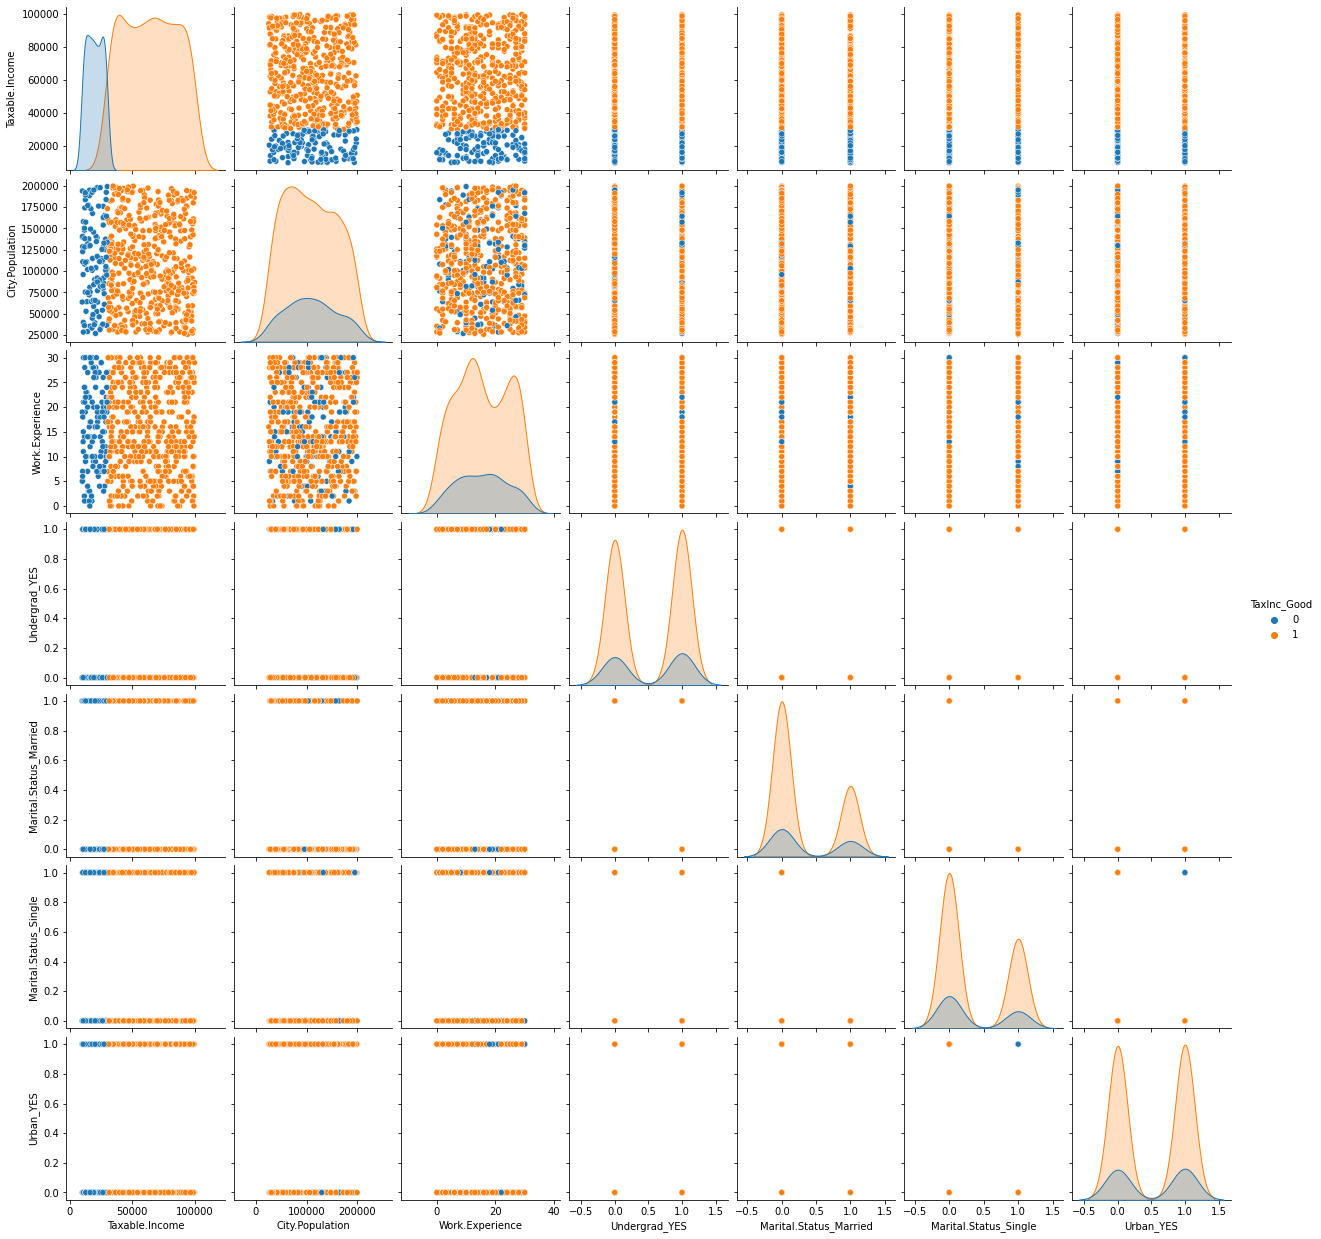

In [ ]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=data, hue='TaxInc_Good')

In [ ]:
# Normalization function
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)


In [ ]:
# Normalized data frame (considering the numerical part of data)

data_norm=norm_func(data.iloc[:,1:])
data_norm.tail(15)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
585,0.642780,0.066667,0.0,0.0,1.0,1.0,1.0
586,0.462365,1.000000,1.0,0.0,1.0,0.0,1.0
587,0.740797,0.866667,0.0,0.0,1.0,1.0,1.0
588,0.387721,0.900000,1.0,1.0,0.0,1.0,1.0
589,0.028707,0.333333,1.0,1.0,0.0,0.0,1.0
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0


In [ ]:
# Declaring features & target
X=data_norm.drop(['TaxInc_Good'], axis=1)
y=data_norm['TaxInc_Good']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data into train & test
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
##Converting the Taxable income variable to bucketing.
data_norm["income"]="<=30000"
data_norm.loc[data["Taxable.Income"]>=30000,"income"]="Good"
data_norm.loc[data["Taxable.Income"]<=30000,"income"]="Risky"


In [ ]:
##Droping the Taxable income variable
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [ ]:
data.rename(columns={"Undergrad":"undergrad", "Marital.Status":"marital","City.Population":"population","Work.Experience":"experience", "Urban":"urban"})


,population,experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,1
598,180083,17,1,1,0,0,1


In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in data.columns:
  if data[column_name].dtype==object:
    data[column_name] = le.fit_transform(data[column_name])
else:
      pass

In [ ]:
#Splitting the data into featuers and labels
features = data.iloc[:,0:5]
labels = data.iloc[:,5]

In [ ]:
# Collecting the column names
colnames= list(data.columns)
predictors = colnames[0:5]
target = colnames[5]

In [ ]:
#Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(features,labels, test_size=0.2, stratify=labels)

In [ ]:
#Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [ ]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2

In [ ]:
model.n_outputs_

1

In [ ]:
model.oob_score_

0.5083333333333333

In [ ]:
#Predictions on train data
prediction = model.predict(X_train)

In [ ]:
##Accuracy
# For accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [ ]:
np.mean(prediction == y_train)

0.9916666666666667

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [ ]:
#Prediction on test data
pred_test = model.predict(X_test)

In [ ]:
#Accuracy
acc_test=accuracy_score(y_test,pred_test)

In [ ]:
# In random forest we can plot a Decision tree present in Random forest
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [ ]:
tree= model.estimators_[5]

In [ ]:
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data, filled=True, rounded=True, feature_names=predictors,class_names=target, impurity=False)

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

**Building Decision Tree Classifier using Entropy Criteria**

In [ ]:
model= DecisionTreeClassifier(criterion= 'entropy', max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
from sklearn import tree

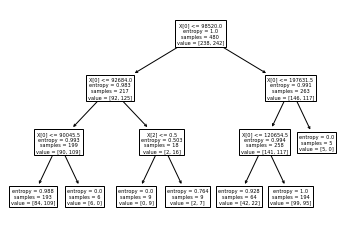

In [ ]:
#PLot the decision tree
tree.plot_tree(model);

In [ ]:
colnames=list(data.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

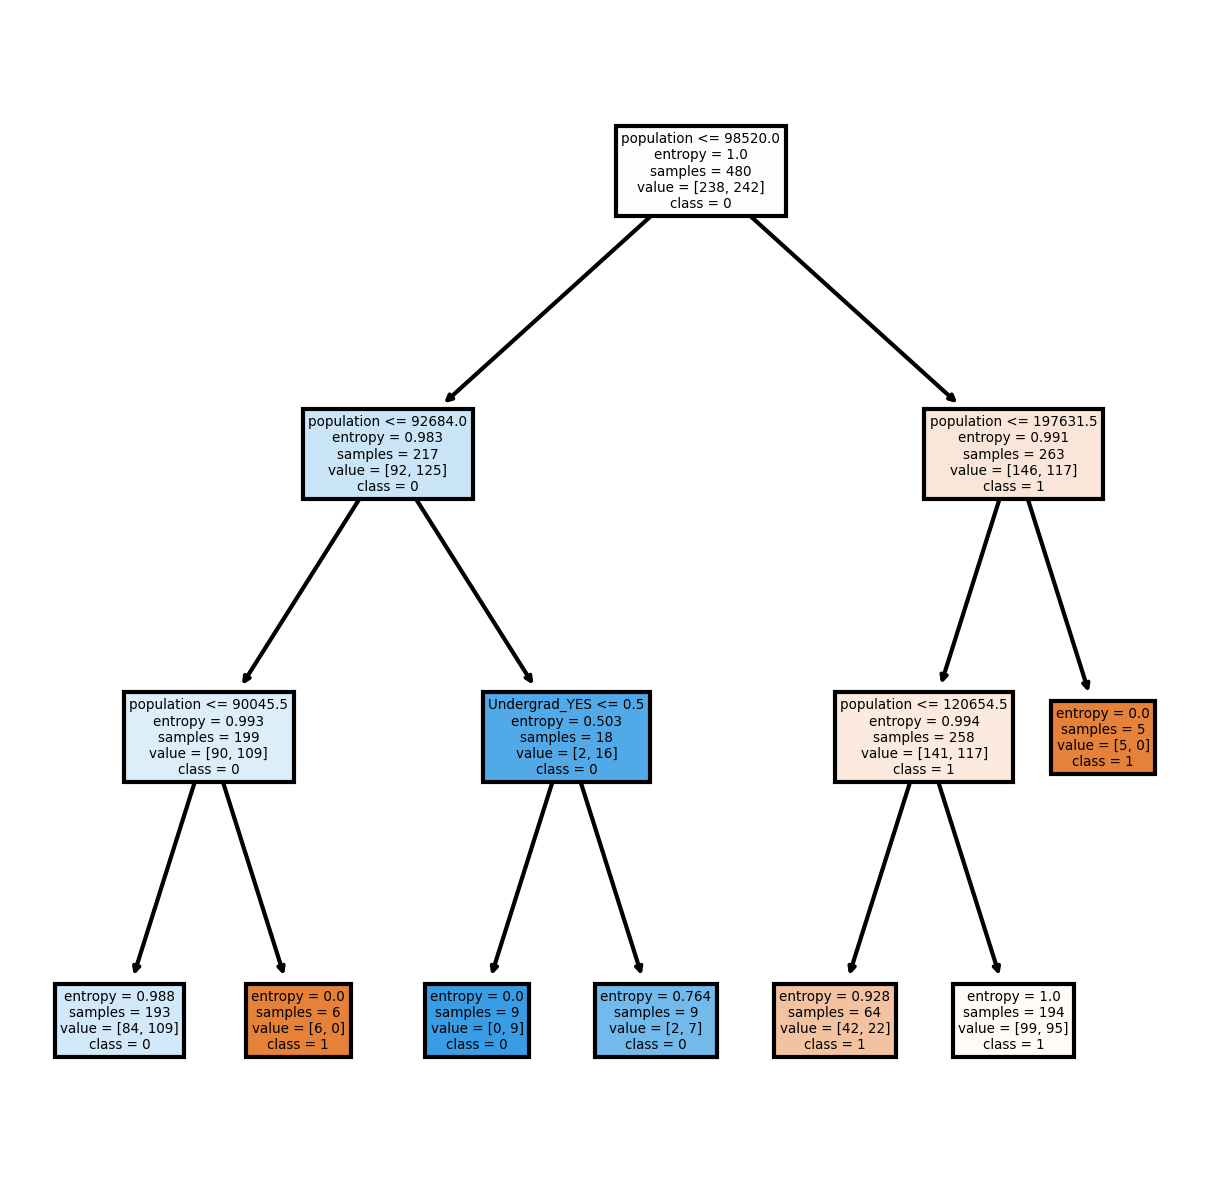

In [ ]:
fn=['population', 'experience', 'Undergrad_YES', 'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES']
cn=['1', '0']
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=300)
tree.plot_tree(model,
               feature_names= fn,
               class_names= cn,
               filled= True);

In [ ]:
#Predicting on test data
preds=model.predict(X_test)
pd.Series(preds).value_counts()

0    70
1    50
dtype: int64

In [ ]:
preds

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1], dtype=uint8)

In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1
Urban_YES,,
0,32,28
1,38,22


In [ ]:
# Accuracy
np.mean(preds==y_test)

0.45

**Building Decision Tree Classifier(CART) using Gini Criteria**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini= DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)